# TFY4345 - Classical Mechanics - Numerical Exercise


In [17]:
'''Imports packages, functions and constants'''
# Simple pendulum with Eulers method:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import rc
from matplotlib.animation import FuncAnimation
from scipy.constants import g
from scipy.integrate import solve_ivp
from IPython.display import HTML

In [18]:
# Set common figure parameters:
newparams = {'axes.labelsize': 11, 'axes.linewidth': 1, 'savefig.dpi': 300, 
             'lines.linewidth': 1.0, 'figure.figsize': (8, 3),
             'ytick.labelsize': 10, 'xtick.labelsize': 10,
             'ytick.major.pad': 5, 'xtick.major.pad': 5,}
plt.rcParams.update(newparams)

In [19]:
'''Total energy of a pendulum'''
def energies(theta, omg):
    T = (1/2)*m*(l**2)*omg**2
    V = m*g*l*(1 - np.cos(theta))
    E_tot = T + V
    return T, V, E_tot

## Simple Pendulum

### 1. Implement the simple Euler algorithm for studying the numerical solution and test the effect of time step.

In [88]:
'''Functions for Eulers method'''
def euler_step(theta_vec, omg_vec, i, dt):
    omg_vec[i+1] = omg_vec[i] - (g/l)*np.sin(theta_vec[i])*dt
    theta_vec[i+1] = theta_vec[i] + omg_vec[i]*dt


def euler_solve(theta_vec, omg_vec, dt):
    for i in range(timesteps-1):
        euler_step(theta_vec, omg_vec, i, dt)

In [93]:
'''Parameters and initial conditiions'''
theta_0 = 0.2 #rad
omg_0 = 0 #rad/s
l = 1.0 #m (meter)
m = 1.0 #kg
g = 9.81 #m/(s^2)
sim_time = 5 #s, simulation time
dt = 0.001 # s, timestep
timesteps = int(sim_time/dt)
phi = np.pi/2 #when omg_0 =0 

In [94]:
t_vec = np.linspace(0, sim_time, timesteps)
"""Anlytical values """
theta_vec_analy = theta_0*np.sin(t_vec*np.sqrt(g/l) + phi)
omg_vec_analy= theta_0*np.cos(t_vec*np.sqrt(g/l) + phi)*np.sqrt(g/l)


'''Numerical arrays with vals for plotting'''
omg_vec = np.zeros(timesteps)
theta_vec = np.zeros(timesteps)


# set initial values
omg_vec[0] = omg_0
theta_vec[0] = theta_0

In [95]:
euler_solve(theta_vec, omg_vec, dt)
kin_energy, pot_energy, total_energy = energies(theta_vec, omg_vec)
kin_energy_analy, pot_energy_analy, total_energy_analy = energies(theta_vec_analy, omg_vec_analy)





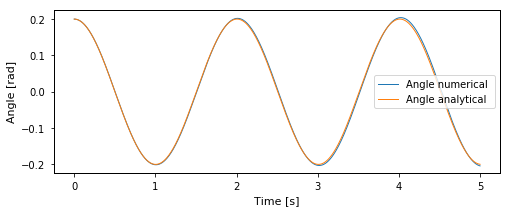

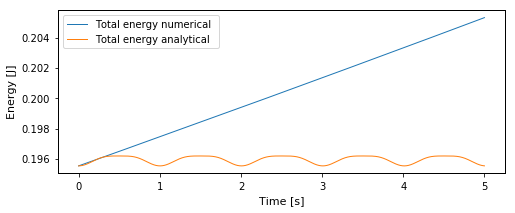

In [96]:
# plot results
plt.plot(t_vec, theta_vec, label = "Angle numerical ")
plt.plot(t_vec, theta_vec_analy, label = "Angle analytical ")
plt.xlabel("Time [s]")
plt.ylabel("Angle [rad]")
plt.legend()
plt.show()

plt.plot(t_vec, total_energy, label = "Total energy numerical ")
plt.plot(t_vec, total_energy_analy, label = "Total energy analytical ")
plt.xlabel("Time [s]")
plt.ylabel("Energy [J]")
plt.legend()
plt.show()


When the inital angle is to large the two methods differ. For the initial condition of $\theta_0 = 0.2$ rad it is sufficient to have a timestep of about 0.001 seconds. Still for all parameters the total energy of the computed solution and analytical solution differs a lot 


### 2. Add Euler-Cromer and Runge-Kutta (4th order) options for solving the differential equations.

In [97]:
def euler_cromer_step(theta_vec, omg_vec, i, dt):
    omg_vec[i+1] = omg_vec[i] - (g/l)*np.sin(theta_vec[i])*dt
    theta_vec[i+1] = theta_vec[i] + omg_vec[i+1]*dt

    
def euler_cromer_solve(theta_vec, omg_vec, dt):
    for i in range(timesteps-1):
        euler_cromer_step(theta_vec, omg_vec, i, dt)

In [10]:
'''New arrays for Euler-Cromer'''
omg_vec_cromer = np.zeros(timesteps)
theta_vec_cromer = np.zeros(timesteps)


# set initial values
omg_vec_cromer[0] = omg_0
theta_vec_cromer[0] = theta_0

In [11]:
euler_cromer_solve(theta_vec_cromer, omg_vec_cromer, dt)
kin_energy_cromer, pot_energy_cromer, total_energy_cromer = energies(theta_vec_cromer, omg_vec_cromer)

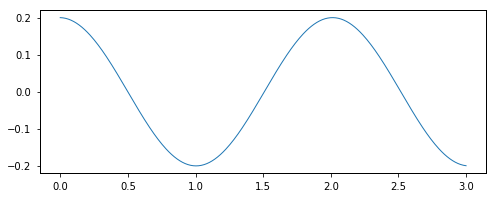

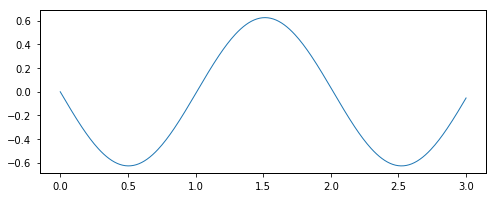

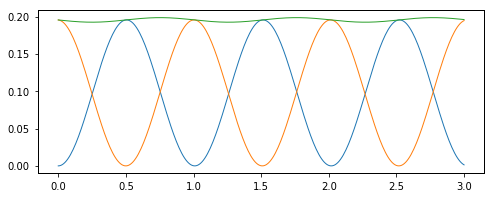

In [12]:
# plot results
plt.plot(t_vec, theta_vec_cromer)
plt.show()

plt.plot(t_vec, omg_vec_cromer)
plt.show()

plt.plot(t_vec, kin_energy_cromer)
plt.plot(t_vec, pot_energy_cromer)
plt.plot(t_vec, total_energy_cromer)
plt.show()

In [25]:
'''Animation'''
# cartesian coordinates of the pendulum tip
x = np.sin(theta_vec_cromer)
y = -np.cos(theta_vec_cromer)


# Set up fig and stuff for the animated plot
fig = plt.figure(figsize=(2,2), dpi=60)
ax = plt.axes(xlim=(-2, 2), ylim=(-2, 2))
string, = ax.plot([], [], lw=2)
mass = plt.Circle((x[0], y[0]), 0.05, color='blue')


def init():
    string.set_data([],[])
    ax.add_artist(mass)
    return string,


def animate(i):
    mass.center = (x[i], y[i])
    string.set_data([0, x[i]], [0, y[i]])
    return string, mass


anim = FuncAnimation(fig, animate, init_func=init, frames=timesteps, interval=1000*dt, blit=True)
plt.close(anim._fig)
HTML(anim.to_html5_video())

RuntimeError: Requested MovieWriter (ffmpeg) not available

### Runge-Kutta 4th order

In [26]:
"""
y = [thetea, omega]
"""

def ddt_omg_theta(t, y):
    return [y[1], -(g/l)*np.sin(y[0])]

In [32]:
sol = solve_ivp(ddt_omg_theta, [0, 3], [0.2, 0], max_step = dt )
kin_energy_RK45, pot_energy_RK45, total_energy_RK45 = energies(sol.y[0], sol.y[1])

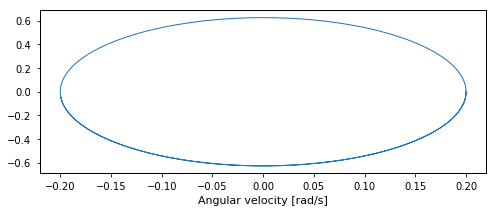

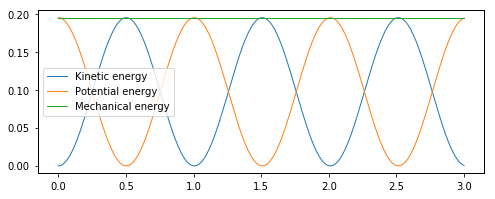

In [44]:
plt.plot(sol.y[0], sol.y[1], )
plt.xlabel("Angle [rad]")
plt.xlabel("Angular velocity [rad/s]")

plt.show()

plt.plot(sol.t, kin_energy_RK45, label = "Kinetic energy")
plt.plot(sol.t, pot_energy_RK45, label = "Potential energy")
plt.plot(sol.t, total_energy_RK45, label = "Mechanical energy")
plt.legend()
plt.show()
